# The car insurance company evaluates accident losses

Now cars have been very popular, every car basically needs to buy insurance, so every day there are a lot of car accidents need to be assessed, and then claim.Insurance companies need to cultivate a large number of personnel to accident assessment, evaluation results hate big depends on the personal experience, the accuracy of the result of the accident assessment brings adverse impact, in order to improve the accident assessment accuracy, we need an accurate model, using the model can improve the assessment accuracy, and shorten the assessment in time, to reduce the difficulty and also reduce staff capacity requirements, and indirectly reduce the cost of insurance company personnel.

So we need to use machine learning methods based on accident history data.Simplify accident assessment through data understanding, data preprocessing and cleaning, modeling, evaluation, deployment, and other steps.

## Understand and select data

Remove the date, description, and KEY columns from your Data-cancers Data,Leave ADDRTYPE, SEVERITYCODE, COLLISIONTYPE, PERSONCOUNT, PEDCYLCOUNT, VEHCOUNT, JUNCTIONTYPE, SDOT_COLCODE, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, ST_COLCODE, with SEVERITYCODE column as the result column.These data are preprocessed and then the correlation analysis is performed to analyze the correlation between each column and the result column.

## Preprocessing data

In [68]:
import pandas as pd
import numpy as np


In [69]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_54ef78f057614ac49310c7345b9815a6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='F7g-2TQrSB5xBhQd6vgusAEZNeXxJMz0IlY4bLnoR3et',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_54ef78f057614ac49310c7345b9815a6.get_object(Bucket='predictbuyingbehaviorwithml-donotdelete-pr-onewgy1h6tr5bc',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
cols = ["ADDRTYPE","COLLISIONTYPE","PERSONCOUNT","PEDCYLCOUNT","VEHCOUNT","JUNCTIONTYPE",\
                     "SDOT_COLCODE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","ST_COLCODE","SEVERITYCODE"]

In [71]:
df_data = df_data_1[cols]


In [72]:
# The statistical null values
missing_data = df_data.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

ST_COLCODE
False    194655
True         18
Name: ST_COLCODE, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64



In [73]:
df_data = df_data.dropna(subset=["ADDRTYPE"], axis=0)
df_data = df_data.dropna(subset=["COLLISIONTYPE"], axis=0)
df_data = df_data.dropna(subset=["JUNCTIONTYPE"], axis=0)
df_data = df_data.dropna(subset=["UNDERINFL"], axis=0)
df_data = df_data.dropna(subset=["WEATHER"], axis=0)
df_data = df_data.dropna(subset=["ROADCOND"], axis=0)
df_data = df_data.dropna(subset=["LIGHTCOND"], axis=0)
df_data = df_data.dropna(subset=["ST_COLCODE"], axis=0)
df_data.count()

ADDRTYPE         182895
COLLISIONTYPE    182895
PERSONCOUNT      182895
PEDCYLCOUNT      182895
VEHCOUNT         182895
JUNCTIONTYPE     182895
SDOT_COLCODE     182895
UNDERINFL        182895
WEATHER          182895
ROADCOND         182895
LIGHTCOND        182895
ST_COLCODE       182895
SEVERITYCODE     182895
dtype: int64

In [74]:
df_data["ADDRTYPE"].value_counts()

Block           119362
Intersection     63298
Alley              235
Name: ADDRTYPE, dtype: int64

In [75]:
from sklearn import preprocessing
lab_ADDRTYPE = preprocessing.LabelEncoder()
lab_ADDRTYPE.fit(['Block','Intersection','Alley'])
ADDRTYPE_col = lab_ADDRTYPE.transform(df_data["ADDRTYPE"]) 
ADDRTYPE_col[0:20]

array([2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1])

In [76]:
lab_COLLISIONTYPE = preprocessing.LabelEncoder()
lab_COLLISIONTYPE.fit(['Parked Car','Angles','Rear Ended','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'])
COLLISIONTYPE_col = lab_COLLISIONTYPE.transform(df_data["COLLISIONTYPE"]) 
COLLISIONTYPE_col[0:20]

array([0, 9, 5, 4, 0, 0, 0, 1, 5, 0, 4, 0, 7, 5, 2, 3, 7, 7, 5, 7])

In [77]:
lab_JUNCTIONTYPE = preprocessing.LabelEncoder()
JUNCTIONTYPE_values = ['Mid-Block (not related to intersection)','At Intersection (intersection related)','Mid-Block (but intersection related)',\
                      'Driveway Junction','At Intersection (but not related to intersection)','Unknown','Ramp Junction']
lab_JUNCTIONTYPE.fit(JUNCTIONTYPE_values)
JUNCTIONTYPE_col = lab_JUNCTIONTYPE.transform(df_data["JUNCTIONTYPE"]) 
JUNCTIONTYPE_col[0:30]

array([1, 4, 4, 4, 1, 1, 1, 1, 4, 1, 2, 1, 4, 4, 4, 1, 3, 4, 4, 4, 1, 4,
       4, 1, 4, 1, 2, 4, 4, 1])

In [78]:
lab_UNDERINFL = preprocessing.LabelEncoder()
UNDERINFL_values = ['N','0','Y','1']
lab_UNDERINFL.fit(UNDERINFL_values)
UNDERINFL_col = lab_UNDERINFL.transform(df_data["UNDERINFL"]) 
UNDERINFL_col[0:30]

array([2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 0, 0])

In [79]:
lab_WEATHER = preprocessing.LabelEncoder()
WEATHER_values = ['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind'\
               ,'Partly Cloudy']
lab_WEATHER.fit(WEATHER_values)
WEATHER_col = lab_WEATHER.transform(df_data["WEATHER"]) 
WEATHER_col[0:30]

array([ 4,  6,  4,  1,  6,  1,  6,  1,  1,  1,  4,  1,  6,  6,  1,  4,  4,
        1, 10,  1,  1,  1, 10,  1,  1,  4,  1,  1,  1,  6])

In [80]:
lab_ROADCOND = preprocessing.LabelEncoder()
ROADCOND_values = ['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil']
lab_ROADCOND.fit(ROADCOND_values)
ROADCOND_col = lab_ROADCOND.transform(df_data["ROADCOND"]) 
ROADCOND_col[0:30]

array([8, 8, 0, 0, 8, 0, 8, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0,
       7, 0, 0, 8, 0, 0, 0, 8])

In [81]:
lab_LIGHTCOND = preprocessing.LabelEncoder()
LIGHTCOND_values = ['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off',\
                    'Other','Dark - Unknown Lighting']
lab_LIGHTCOND.fit(LIGHTCOND_values)
LIGHTCOND_col = lab_LIGHTCOND.transform(df_data["LIGHTCOND"]) 
LIGHTCOND_col[0:30]

array([5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 0, 2, 5, 5, 5, 8, 2, 5, 2,
       8, 5, 5, 8, 5, 5, 5, 2])

In [82]:
df_data["ADDRTYPE"] = ADDRTYPE_col
df_data["LIGHTCOND"] = LIGHTCOND_col
df_data["ROADCOND"] = ROADCOND_col
df_data["WEATHER"] = WEATHER_col
df_data["UNDERINFL"] = UNDERINFL_col
df_data["JUNCTIONTYPE"] = JUNCTIONTYPE_col
df_data["COLLISIONTYPE"] = COLLISIONTYPE_col

df_data.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEVERITYCODE
0,2,0,2,0,2,1,11,2,4,8,5,10,2
1,1,9,2,0,2,4,16,0,6,8,2,11,1
2,1,5,4,0,3,4,14,0,4,0,5,32,1
3,1,4,3,0,3,4,11,2,1,0,5,23,1
4,2,0,2,0,2,1,11,0,6,8,5,10,2


In [86]:
x_cols = ["ADDRTYPE","COLLISIONTYPE","PERSONCOUNT","PEDCYLCOUNT","VEHCOUNT","JUNCTIONTYPE","SDOT_COLCODE",\
"UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","ST_COLCODE"]
x_df_data = df_data[x_cols]
#x_df_data.head()
X = preprocessing.StandardScaler().fit(x_df_data).transform(x_df_data.astype(float))
X[0:2]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 1.37070179, -1.59060052, -0.34741051, -0.17401012,  0.04974136,
        -1.24630968, -0.51842213,  0.84077056,  0.37890804,  1.50522231,
         0.39208916, -0.86330544],
       [-0.72134794,  1.60132589, -0.34741051, -0.17401012,  0.04974136,
         0.93401103,  0.25203914, -1.1201036 ,  1.11150123,  1.50522231,
        -1.40797978, -0.79469881]])

In [87]:
#Correlation analysis
df_data_corr = pd.DataFrame(data=df_data, columns = cols)
df_data_corr.corr()['SEVERITYCODE'].sort_values()

JUNCTIONTYPE    -0.200887
COLLISIONTYPE   -0.127117
WEATHER         -0.090768
VEHCOUNT        -0.081166
LIGHTCOND       -0.042661
ROADCOND        -0.037238
UNDERINFL        0.042745
PERSONCOUNT      0.124545
SDOT_COLCODE     0.164886
ADDRTYPE         0.192744
PEDCYLCOUNT      0.214043
SEVERITYCODE     1.000000
Name: SEVERITYCODE, dtype: float64

All the columns have some correlation, so all the columns are left.

In [91]:
Y = df_data["SEVERITYCODE"]
Y = Y.values
Y[0:2]

array([2, 1])

## Modeling and Training

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

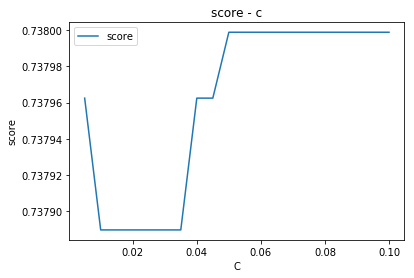

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score


c_s = np.linspace(0.005,0.1, 20)
test_scores = []
for c in c_s:
    LR = LogisticRegression(C=c, solver='liblinear').fit(x_train,y_train)
    yhat = LR.predict(x_test)

    jac_score = jaccard_similarity_score(y_test, yhat)
    test_scores.append(jac_score)
plt.plot(c_s, test_scores, label = 'score')
plt.xlabel('C')
plt.ylabel('score')
plt.title('score - c')
plt.legend()

As can be seen from the figure above, when C=0.05, score reaches a large value, so C is taken as 0.05.

In [97]:
c=0.05
LR = LogisticRegression(C=c, solver='liblinear').fit(x_train,y_train)


## Model Evaluation 

In [99]:
yhat = LR.predict(x_test)

jac_score = jaccard_similarity_score(y_test, yhat)
print("jac_score = %.2f"%jac_score)

jac_score = 0.74
